# Agriculture Production Factors

## We aimed to figuring out how different production factors impacted the agriculture production.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn import preprocessing as prep
import seaborn as sn

# BRAZIL:

In [2]:
"""Dataset: World Bank Indicators"""
main_data = pd.read_csv('c:/users/acer/edxenv/Week-5-Visualization/wdi-csv-zip-57-mb-/indicators.csv')

## Finding indicators

In [3]:
main_data = main_data[main_data['CountryName']=='Brazil']
main_data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5630,Brazil,BRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,92.046800
5631,Brazil,BRA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,86.888705
5632,Brazil,BRA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.865863
5633,Brazil,BRA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.022843
5634,Brazil,BRA,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,20.592814
...,...,...,...,...,...,...
5645204,Brazil,BRA,Time required to register property (days),IC.PRP.DURS,2015,31.700000
5645205,Brazil,BRA,Time required to start a business (days),IC.REG.DURS,2015,83.000000
5645206,Brazil,BRA,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2600.000000
5645207,Brazil,BRA,Time to resolve insolvency (years),IC.ISV.DURS,2015,4.000000


In [4]:
main_data = main_data.dropna()

Finding Brazil agricultural land as % of land area:


In [5]:
agri_land_data = main_data[main_data['IndicatorName'].str.contains('Agricultural land')&main_data['IndicatorName'].str.contains('of')]

In [6]:
agri_land_data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
29705,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,18.010108
56740,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1962,18.654031
85129,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1963,19.323797
113841,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1964,19.865784
143482,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1965,20.386713
175309,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1966,20.948919
206955,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1967,21.486718
239632,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1968,22.160792
272318,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1969,23.184345
312008,Brazil,BRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1970,23.378048


In [7]:
agri_land_data = agri_land_data.drop(['CountryName','CountryCode','IndicatorName','IndicatorCode'], axis='columns')

In [8]:
agri_land_data = agri_land_data.set_index('Year')

In [9]:
agri_land_data = agri_land_data.set_axis(['Agricultural Land (% of land)'], axis=1, inplace=False)

In [10]:
type(agri_land_data)

pandas.core.frame.DataFrame

In [11]:
"""Indicator Agricultural Land is ready!"""
agri_land_data

,Agricultural Land (% of land)
Year,
1961,18.010108
1962,18.654031
1963,19.323797
1964,19.865784
1965,20.386713
1966,20.948919
1967,21.486718
1968,22.160792
1969,23.184345


In [12]:
"""Dataset: World Bank Indicators - Fertilizer Consumption"""
fert_data = pd.read_excel('c:/users/acer/edxenv/Final Project/API_AG.CON.FERT.ZS_DS2_en_excel_v2_4770975.xls', 'Data')

In [13]:
"""Cleanning data"""
fert_data.set_axis(fert_data.iloc[2], axis=1, inplace=True)

In [171]:
fert_data = fert_data.drop(index=[0,1,2])
fert_data.hea

KeyError: '[0, 1, 2] not found in axis'

In [15]:
fert_data = fert_data[fert_data['Country Name']=='Brazil']

In [16]:
#Transposing
fert_data = fert_data.T
fert_data

,32
2,
Country Name,Brazil
Country Code,BRA
Indicator Name,Fertilizer consumption (kilograms per hectare ...
Indicator Code,AG.CON.FERT.ZS
1960.0,NaN
...,...
2017.0,275.933902
2018.0,293.864762
2019.0,296.727982


In [17]:
fert_data.set_axis(['Fertilizer consumption (kg/ha)'], axis=1, inplace=True)

In [18]:
fert_data

,Fertilizer consumption (kg/ha)
2,
Country Name,Brazil
Country Code,BRA
Indicator Name,Fertilizer consumption (kilograms per hectare ...
Indicator Code,AG.CON.FERT.ZS
1960.0,NaN
...,...
2017.0,275.933902
2018.0,293.864762
2019.0,296.727982


In [19]:
fert_data = fert_data.drop(index=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 1960.0,])

In [20]:
fert_data.index.name = 'Year'

In [21]:
fert_data = fert_data.dropna()

In [22]:
fert_data.index = list(range(1961, 2021))

In [23]:
"""First indicator dataframe is ready!"""
fert_data

,Fertilizer consumption (kg/ha)
1961,11.42729
1962,10.600737
1963,12.0623
1964,9.821185
1965,10.832317
1966,10.506927
1967,16.711749
1968,22.014818
1969,22.626036
1970,35.521414


Finding irrigation data:

In [24]:
main_data[main_data['IndicatorName'].str.contains('irrig')]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4163526,Brazil,BRA,Agricultural irrigated land (% of total agricu...,AG.LND.IRIG.AG.ZS,2006,1.632794
4341446,Brazil,BRA,Agricultural irrigated land (% of total agricu...,AG.LND.IRIG.AG.ZS,2007,1.639682


In [25]:
#As we do not have enough data about irrigation, it will no longer take part in this analysis

Finding the gross production of cereals, in terms of metric tons:

In [26]:

cereal_prod = main_data[main_data['IndicatorName'].str.contains('Cereal production')]


cereal_prod = cereal_prod[cereal_prod['CountryName']=='Brazil']


cereal_prod = cereal_prod.set_index(cereal_prod['Year'])


cereal_prod = cereal_prod.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])


cereal_prod.set_axis(['Cereal production (million metric tons)'], axis=1, inplace=True)

cereal_prod['Cereal production (million metric tons)'] = cereal_prod['Cereal production (million metric tons)']/10e6

In [27]:
"""Indicator 'Cereal Production' is ready!"""
cereal_prod

,Cereal production (million metric tons)
Year,
1961,1.503635
1962,1.591834
1963,1.661689
1964,1.646923
1965,2.035079
1966,1.786792
1967,2.032233
1968,2.041880
1969,2.054986


Finding the productivity of cereals, in terms of kg per hectares:

In [28]:

cereal_data = main_data[main_data['IndicatorName'].str.contains('Cereal yield')]


cereal_data = cereal_data[cereal_data['CountryName']=='Brazil']


cereal_data = cereal_data.set_index(cereal_data['Year'])


cereal_data = cereal_data.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])


cereal_data.set_axis(['Cereal yield (kg/ha)'], axis=1, inplace=True)


In [29]:
"""Indicator 'Cereal Yield' is ready!"""
cereal_data

,Cereal yield (kg/ha)
Year,
1961,1346.301
1962,1381.522
1963,1322.444
1964,1256.435
1965,1428.334
1966,1321.273
1967,1402.193
1968,1350.452
1969,1302.765


Finding livestock data. The  only indicator related on World Bank dataset is 'livestock production index' which is a ration of the livestock production in a given year (in this case, 2005).

In [30]:
lvstck_data = main_data[main_data['IndicatorName'].str.contains('Livestock')]

In [31]:
lvstck_data = lvstck_data.set_index(lvstck_data['Year'])

In [32]:
lvstck_data = lvstck_data.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])

In [33]:
lvstck_data.set_axis(['Livestock Index (%, /2005)'], axis=1, inplace=True)

In [34]:
"""Indicator 'Livestock Index' is ready!"""
lvstck_data

,"Livestock Index (%, /2005)"
Year,
1961,13.63
1962,13.93
1963,14.09
1964,15.12
1965,15.98
1966,16.08
1967,16.45
1968,17.96
1969,18.83


Finding employment on agriculture:

In [35]:
employ_data = main_data[main_data['IndicatorName'].str.contains('Employment in agriculture')]
employ_data = employ_data[employ_data['IndicatorName'].str.contains('total')]


In [36]:
employ_data = employ_data[employ_data['CountryName']=='Brazil']

In [37]:
employ_data = employ_data.set_index(employ_data['Year'])

In [38]:
employ_data = employ_data.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])

In [39]:
employ_data.set_axis(['Employment in Agriculture (%)'], axis=1, inplace=True)

In [40]:
"""Indicator Employment on Agriculture is ready!"""
employ_data

,Employment in Agriculture (%)
Year,
1981,29.299999
1982,29.500000
1983,27.100000
1984,29.799999
1985,28.600000
1986,25.900000
1987,24.600000
1988,24.200001
1989,23.200001


Finding the number of tractors:

In [41]:
main_data[main_data['IndicatorName']=='Agricultural machinery, tractors']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
29707,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1961,72000.0
56742,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1962,82000.0
85131,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1963,93000.0
113843,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1964,103000.0
143484,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1965,114000.0
175311,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1966,124000.0
206957,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1967,134500.0
239634,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1968,145000.0
272320,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1969,155400.0
312010,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1970,165870.0


In [42]:
tractor_data = main_data[main_data['IndicatorName']=='Agricultural machinery, tractors']

In [43]:
tractor_data = tractor_data[tractor_data['CountryName']=='Brazil']

In [44]:
tractor_data = tractor_data.set_index(tractor_data['Year'])

In [45]:
tractor_data = tractor_data.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])

In [46]:
tractor_data.set_axis(['Number of Tractors'], axis=1, inplace=True)

In [47]:
"""Indicator Number of Tractors is ready!"""
tractor_data

,Number of Tractors
Year,
1961,72000.0
1962,82000.0
1963,93000.0
1964,103000.0
1965,114000.0
1966,124000.0
1967,134500.0
1968,145000.0
1969,155400.0


Finding the forest area, as % of land

In [48]:
forest_data = main_data[main_data['IndicatorName'].str.contains('Forest area')&main_data['IndicatorName'].str.contains('land')]

forest_data = forest_data[forest_data['CountryName']=='Brazil']

forest_data = forest_data.set_index(forest_data['Year'])

forest_data = forest_data.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])

forest_data.set_axis(['Forest area (% of land area)'], axis=1, inplace=True)

In [49]:
"""Indicator 'Forest Area' is ready!"""
forest_data

,Forest area (% of land area)
Year,
1990,65.409888
1991,65.105622
1992,64.801355
1993,64.497089
1994,64.192823
1995,63.888557
1996,63.584290
1997,63.280024
1998,62.975758


## Merging all the indicators onto a single dataframe

In [50]:
final_data = cereal_prod.merge(lvstck_data, left_index=True, right_index=True)
final_data

,Cereal production (million metric tons),"Livestock Index (%, /2005)"
Year,,
1961,1.503635,13.63
1962,1.591834,13.93
1963,1.661689,14.09
1964,1.646923,15.12
1965,2.035079,15.98
1966,1.786792,16.08
1967,2.032233,16.45
1968,2.041880,17.96
1969,2.054986,18.83


In [51]:
final_data = final_data.merge(agri_land_data, left_index=True, right_index=True)

In [52]:
final_data = final_data.merge(fert_data, left_index=True, right_index=True)

In [53]:
final_data = final_data.merge(cereal_data, left_index=True, right_index=True)

In [54]:
final_data = final_data.merge(tractor_data, left_index=True, right_index=True)

In [55]:
final_data = final_data.merge(employ_data, left_index=True, right_index=True)

In [56]:
final_data = final_data.merge(forest_data, left_index=True, right_index=True)
final_data

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in Agriculture (%),Forest area (% of land area)
1990,3.249039,44.91,28.906910,67.760879,1755.061,728779.0,22.799999,65.409888
1992,4.405800,51.59,29.517213,78.370758,2142.471,753766.0,28.299999,64.801355
1993,4.307346,53.44,29.846712,101.138662,2354.545,766260.0,27.400000,64.497089
1995,4.964182,62.20,30.924584,98.815873,2513.151,791248.0,26.100000,63.888557
1996,4.495717,66.49,30.990029,116.365322,2573.147,803742.0,24.400000,63.584290
1997,4.487128,67.01,31.055474,133.584189,2522.079,802173.0,24.200001,63.280024
1998,4.073418,68.41,31.120800,132.096898,2581.250,800604.0,23.400000,62.975758
1999,4.742895,74.14,31.198209,130.814379,2720.950,799035.0,24.200001,62.671492
2000,4.589336,77.58,31.275619,144.51681,2661.353,797466.0,18.500000,62.367225
2001,5.712461,80.39,31.521965,148.571429,3149.603,795898.0,20.600000,62.019301


In [145]:
final_data

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in Agriculture (%),Forest area (% of land area)
1990,3.249039,44.91,28.906910,67.760879,1755.061,728779.0,22.799999,65.409888
1992,4.405800,51.59,29.517213,78.370758,2142.471,753766.0,28.299999,64.801355
1993,4.307346,53.44,29.846712,101.138662,2354.545,766260.0,27.400000,64.497089
1995,4.964182,62.20,30.924584,98.815873,2513.151,791248.0,26.100000,63.888557
1996,4.495717,66.49,30.990029,116.365322,2573.147,803742.0,24.400000,63.584290
1997,4.487128,67.01,31.055474,133.584189,2522.079,802173.0,24.200001,63.280024
1998,4.073418,68.41,31.120800,132.096898,2581.250,800604.0,23.400000,62.975758
1999,4.742895,74.14,31.198209,130.814379,2720.950,799035.0,24.200001,62.671492
2000,4.589336,77.58,31.275619,144.516810,2661.353,797466.0,18.500000,62.367225
2001,5.712461,80.39,31.521965,148.571429,3149.603,795898.0,20.600000,62.019301


In [58]:
final_data.corr()

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Cereal yield (kg/ha),Number of Tractors,Employment in Agriculture (%),Forest area (% of land area)
Cereal production (million metric tons),1.000000,0.833808,0.833300,0.926665,0.458892,-0.509877,-0.829853
"Livestock Index (%, /2005)",0.833808,1.000000,0.971916,0.891473,0.568545,-0.769167,-0.995608
Agricultural Land (% of land),0.833300,0.971916,1.000000,0.915041,0.722229,-0.695374,-0.974128
Cereal yield (kg/ha),0.926665,0.891473,0.915041,1.000000,0.677855,-0.635663,-0.910209
Number of Tractors,0.458892,0.568545,0.722229,0.677855,1.000000,-0.349078,-0.604315
Employment in Agriculture (%),-0.509877,-0.769167,-0.695374,-0.635663,-0.349078,1.000000,0.779932
Forest area (% of land area),-0.829853,-0.995608,-0.974128,-0.910209,-0.604315,0.779932,1.000000


Notice that 'Fertilize Data' is not part of the correlation. It happens because this indicator has come from a different dataset and its dtype has not been assigned as 'numeric', as you can see in the next lines. It's been corrected in next lines.

In [59]:
final_data.columns

Index(['Cereal production (million metric tons)', 'Livestock Index (%, /2005)',
       'Agricultural Land (% of land)', 'Fertilizer consumption (kg/ha)',
       'Cereal yield (kg/ha)', 'Number of Tractors',
       'Employment in Agriculture (%)', 'Forest area (% of land area)'],
      dtype='object')

In [60]:
final_data['Fertilizer consumption (kg/ha)'].dtype

dtype('O')

In [61]:
final_data['Fertilizer consumption (kg/ha)'] = pd.to_numeric(final_data['Fertilizer consumption (kg/ha)'])

In [62]:
final_data

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in Agriculture (%),Forest area (% of land area)
1990,3.249039,44.91,28.906910,67.760879,1755.061,728779.0,22.799999,65.409888
1992,4.405800,51.59,29.517213,78.370758,2142.471,753766.0,28.299999,64.801355
1993,4.307346,53.44,29.846712,101.138662,2354.545,766260.0,27.400000,64.497089
1995,4.964182,62.20,30.924584,98.815873,2513.151,791248.0,26.100000,63.888557
1996,4.495717,66.49,30.990029,116.365322,2573.147,803742.0,24.400000,63.584290
1997,4.487128,67.01,31.055474,133.584189,2522.079,802173.0,24.200001,63.280024
1998,4.073418,68.41,31.120800,132.096898,2581.250,800604.0,23.400000,62.975758
1999,4.742895,74.14,31.198209,130.814379,2720.950,799035.0,24.200001,62.671492
2000,4.589336,77.58,31.275619,144.516810,2661.353,797466.0,18.500000,62.367225
2001,5.712461,80.39,31.521965,148.571429,3149.603,795898.0,20.600000,62.019301


In [63]:
final_data['Fertilizer consumption (kg/ha)'].dtype

dtype('float64')

In [64]:
final_data.corr()

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in Agriculture (%),Forest area (% of land area)
Cereal production (million metric tons),1.000000,0.833808,0.833300,0.856040,0.926665,0.458892,-0.509877,-0.829853
"Livestock Index (%, /2005)",0.833808,1.000000,0.971916,0.933390,0.891473,0.568545,-0.769167,-0.995608
Agricultural Land (% of land),0.833300,0.971916,1.000000,0.928298,0.915041,0.722229,-0.695374,-0.974128
Fertilizer consumption (kg/ha),0.856040,0.933390,0.928298,1.000000,0.891034,0.564545,-0.716525,-0.938371
Cereal yield (kg/ha),0.926665,0.891473,0.915041,0.891034,1.000000,0.677855,-0.635663,-0.910209
Number of Tractors,0.458892,0.568545,0.722229,0.564545,0.677855,1.000000,-0.349078,-0.604315
Employment in Agriculture (%),-0.509877,-0.769167,-0.695374,-0.716525,-0.635663,-0.349078,1.000000,0.779932
Forest area (% of land area),-0.829853,-0.995608,-0.974128,-0.938371,-0.910209,-0.604315,0.779932,1.000000


## In order to make a plot possible (with same scale), we are going to standardize the data with 'preprocessing' package from sk-learn library.

In [65]:
new_data = copy.deepcopy(final_data)

In [66]:
new_data

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in Agriculture (%),Forest area (% of land area)
1990,3.249039,44.91,28.906910,67.760879,1755.061,728779.0,22.799999,65.409888
1992,4.405800,51.59,29.517213,78.370758,2142.471,753766.0,28.299999,64.801355
1993,4.307346,53.44,29.846712,101.138662,2354.545,766260.0,27.400000,64.497089
1995,4.964182,62.20,30.924584,98.815873,2513.151,791248.0,26.100000,63.888557
1996,4.495717,66.49,30.990029,116.365322,2573.147,803742.0,24.400000,63.584290
1997,4.487128,67.01,31.055474,133.584189,2522.079,802173.0,24.200001,63.280024
1998,4.073418,68.41,31.120800,132.096898,2581.250,800604.0,23.400000,62.975758
1999,4.742895,74.14,31.198209,130.814379,2720.950,799035.0,24.200001,62.671492
2000,4.589336,77.58,31.275619,144.516810,2661.353,797466.0,18.500000,62.367225
2001,5.712461,80.39,31.521965,148.571429,3149.603,795898.0,20.600000,62.019301


In [67]:
X = prep.StandardScaler().fit_transform(new_data)
X

array([[-1.92380870e+00, -1.71938014e+00, -2.14296085e+00,
        -1.68484121e+00, -2.26070203e+00, -2.85913805e+00,
        -2.66973220e-07,  1.81104289e+00],
       [-6.40157650e-01, -1.33465060e+00, -1.57391097e+00,
        -1.43610504e+00, -1.32921572e+00, -1.61774748e+00,
         1.92459888e+00,  1.40412970e+00],
       [-7.49410741e-01, -1.22810125e+00, -1.26668428e+00,
        -9.02338213e-01, -8.19306256e-01, -9.97027355e-01,
         1.60966461e+00,  1.20067311e+00],
       [-2.05234087e-02, -7.23575676e-01, -2.61671467e-01,
        -9.56793285e-01, -4.37954930e-01,  2.44412897e-01,
         1.15475962e+00,  7.93759924e-01],
       [-5.40376690e-01, -4.76496373e-01, -2.00650043e-01,
        -5.45367024e-01, -2.93700903e-01,  8.65133023e-01,
         5.59883255e-01,  5.90303331e-01],
       [-5.49907635e-01, -4.46547366e-01, -1.39628619e-01,
        -1.41690877e-01, -4.16488500e-01,  7.87182817e-01,
         4.89898232e-01,  3.86846738e-01],
       [-1.00899926e+00, -3.659154

In [68]:
new_data['Cereal production (million metric tons)']= X[:, 0]
new_data['Livestock Index (%, /2005)']= X[:, 1]
new_data['Agricultural Land (% of land)'] = X[:, 2]
new_data['Fertilizer consumption (kg/ha)'] = X[:, 3]
new_data['Cereal yield (kg/ha)']= X[:, 4]
new_data['Number of Tractors'] = X[:, 5]
new_data['Employment in Agriculture (%)'] = X[:, 6]
new_data['Forest area (% of land area)']= X[:, 7]

In [69]:
new_data

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in Agriculture (%),Forest area (% of land area)
1990,-1.923809,-1.719380,-2.142961,-1.684841,-2.260702,-2.859138,-2.669732e-07,1.811043
1992,-0.640158,-1.334651,-1.573911,-1.436105,-1.329216,-1.617747,1.924599e+00,1.404130
1993,-0.749411,-1.228101,-1.266684,-0.902338,-0.819306,-0.997027,1.609665e+00,1.200673
1995,-0.020523,-0.723576,-0.261671,-0.956793,-0.437955,0.244413,1.154760e+00,0.793760
1996,-0.540377,-0.476496,-0.200650,-0.545367,-0.293701,0.865133,5.598833e-01,0.590303
1997,-0.549908,-0.446547,-0.139629,-0.141691,-0.416488,0.787183,4.898982e-01,0.386847
1998,-1.008999,-0.365915,-0.078719,-0.176559,-0.274218,0.709233,2.099561e-01,0.183390
1999,-0.266085,-0.035900,-0.006542,-0.206626,0.061676,0.631282,4.898982e-01,-0.020066
2000,-0.436488,0.162224,0.065635,0.114612,-0.081619,0.553332,-1.504687e+00,-0.223523
2001,0.809837,0.324064,0.295330,0.209667,1.092326,0.475432,-7.698395e-01,-0.456173


## Plotting data

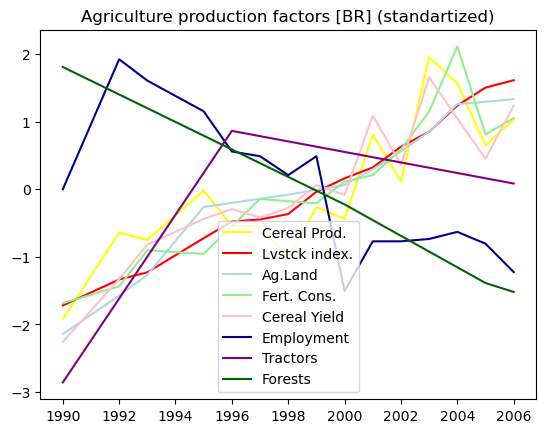

In [158]:
a = new_data.index
b = new_data['Cereal production (million metric tons)']
c = new_data['Livestock Index (%, /2005)']
d = new_data['Agricultural Land (% of land)']
e = new_data['Fertilizer consumption (kg/ha)']
f = new_data['Cereal yield (kg/ha)']
g = new_data['Employment in Agriculture (%)']
h = new_data['Number of Tractors']
i = new_data['Forest area (% of land area)']

plt.plot(a, b, color='yellow', label='Cereal Prod.')
plt.plot(a, c, color='red', label='Lvstck index.')
plt.plot(a, d, color='lightblue', label='Ag.Land')
plt.plot(a, e, color='lightgreen', label='Fert. Cons.')
plt.plot(a, f, color='pink', label='Cereal Yield')
plt.plot(a, g, color='darkblue', label='Employment')
plt.plot(a, h, color='purple', label='Tractors')
plt.plot(a, i, color='darkgreen', label='Forests')


plt.title('Agriculture production factors [BR] (standartized)')
plt.legend(loc='lower center')
plt.show()

## Checking for Correlation

In [71]:
bra_corr = new_data.corr()

In [72]:
bra_corr

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in Agriculture (%),Forest area (% of land area)
Cereal production (million metric tons),1.000000,0.833808,0.833300,0.856040,0.926665,0.458892,-0.509877,-0.829853
"Livestock Index (%, /2005)",0.833808,1.000000,0.971916,0.933390,0.891473,0.568545,-0.769167,-0.995608
Agricultural Land (% of land),0.833300,0.971916,1.000000,0.928298,0.915041,0.722229,-0.695374,-0.974128
Fertilizer consumption (kg/ha),0.856040,0.933390,0.928298,1.000000,0.891034,0.564545,-0.716525,-0.938371
Cereal yield (kg/ha),0.926665,0.891473,0.915041,0.891034,1.000000,0.677855,-0.635663,-0.910209
Number of Tractors,0.458892,0.568545,0.722229,0.564545,0.677855,1.000000,-0.349078,-0.604315
Employment in Agriculture (%),-0.509877,-0.769167,-0.695374,-0.716525,-0.635663,-0.349078,1.000000,0.779932
Forest area (% of land area),-0.829853,-0.995608,-0.974128,-0.938371,-0.910209,-0.604315,0.779932,1.000000


Text(0.5, 1.0, '[BR] Production Factors Correlation')

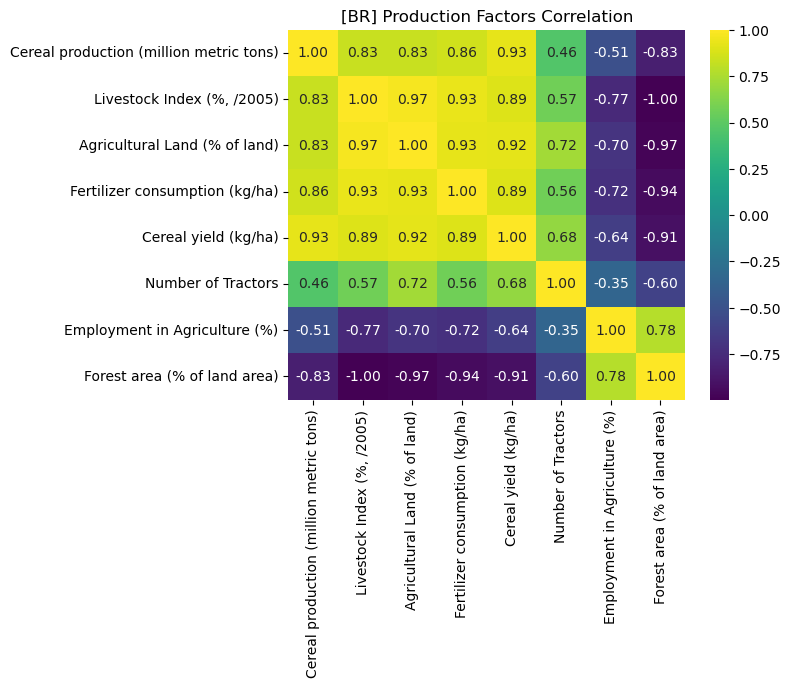

In [168]:
sn.heatmap(bra_corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('[BR] Production Factors Correlation')

# FRANCE:


In [74]:
"""Dataset: World Bank Indicators"""
france_data = pd.read_csv('c:/users/acer/edxenv/Week-5-Visualization/wdi-csv-zip-57-mb-/indicators.csv')

## Finding indicators

In [75]:
france_data = france_data[france_data['CountryName']=='France']
france_data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
9565,France,FRA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,3.394660e+01
9566,France,FRA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,6.090972e+01
9567,France,FRA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,1.864615e+01
9568,France,FRA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,4.226357e+01
9569,France,FRA,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1960,1.619926e+10
...,...,...,...,...,...,...
5647651,France,FRA,Time required to register property (days),IC.PRP.DURS,2015,4.900000e+01
5647652,France,FRA,Time required to start a business (days),IC.REG.DURS,2015,4.000000e+00
5647653,France,FRA,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,1.370000e+02
5647654,France,FRA,Time to resolve insolvency (years),IC.ISV.DURS,2015,1.900000e+00


In [76]:
france_data = france_data.dropna()

Finding France agricultural land as % of land area:


In [77]:
agri_land_france = france_data[france_data['IndicatorName'].str.contains('Agricultural land')&france_data['IndicatorName'].str.contains('of')]

In [78]:
agri_land_france

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
34216,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,63.077328
61625,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1962,62.896528
90067,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1963,62.739469
118799,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1964,62.292034
149228,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1965,62.094798
180952,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1966,61.811727
212781,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1967,61.415428
245400,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1968,60.591783
278159,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1969,60.582651
323268,France,FRA,Agricultural land (% of land area),AG.LND.AGRI.ZS,1970,59.344444


In [79]:
agri_land_france = agri_land_france.drop(['CountryName','CountryCode','IndicatorName','IndicatorCode'], axis='columns')

In [80]:
agri_land_france = agri_land_france.set_index('Year')

In [81]:
agri_land_france = agri_land_france.set_axis(['Agricultural Land (% of land)'], axis=1, inplace=False)

In [82]:
type(agri_land_france)

pandas.core.frame.DataFrame

In [83]:
"""Indicator Agricultural Land is ready!"""
agri_land_france

,Agricultural Land (% of land)
Year,
1961,63.077328
1962,62.896528
1963,62.739469
1964,62.292034
1965,62.094798
1966,61.811727
1967,61.415428
1968,60.591783
1969,60.582651


In [84]:
"""Dataset: World Bank Indicators - Fertilizer Consumption"""
fert_france = pd.read_excel('c:/users/acer/edxenv/Final Project/API_AG.CON.FERT.ZS_DS2_en_excel_v2_4770975.xls', 'Data')

In [85]:
"""Cleanning data"""
fert_france.set_axis(fert_france.iloc[2], axis=1, inplace=True)

In [86]:
fert_france = fert_france.drop(index=[0,1,2])
fert_france

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
3,Aruba,ABW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.063658,19.510062,20.495891,19.815202,21.821774,25.064483,23.192851,23.799653,24.735266,NaN
5,Afghanistan,AFG,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,0.143791,0.142857,0.141935,0.141026,0.141026,...,2.377852,4.882714,10.166112,13.324492,13.680146,20.452529,7.561350,10.973909,8.714495,NaN
6,Africa Western and Central,AFW,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.435961,9.760486,9.832501,10.771815,13.162501,17.059341,16.371883,17.707359,19.609304,NaN
7,Angola,AGO,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,0.374532,0.370370,0.514706,0.763636,1.444043,...,8.876049,9.263957,9.259388,8.048335,7.241269,10.674682,7.930094,7.402000,8.598882,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,"Yemen, Rep.",YEM,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.022575,30.376353,22.431848,1.794963,18.982424,12.732158,3.605039,10.572919,10.628964,NaN
266,South Africa,ZAF,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,17.910083,21.580996,24.380165,28.304527,29.844262,...,61.583333,67.500000,66.491667,62.675000,57.250000,72.825000,63.491667,63.491667,63.491667,NaN
267,Zambia,ZMB,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,NaN,4.001569,3.334639,3.552019,4.056132,4.224270,...,37.626097,48.972138,50.466858,55.910442,63.985558,72.052916,52.510934,67.575600,79.764039,NaN


In [87]:
fert_france = fert_france[fert_france['Country Name']=='France']

In [88]:
fert_france = fert_france.T

In [89]:
fert_france.set_axis(['Fertilizer consumption (kg/ha)'], axis=1, inplace=True)

In [90]:
fert_france = fert_france.drop(index=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 1960.0,])

In [91]:
fert_france.index.name = 'Year'

In [92]:
fert_france = fert_france.dropna()

In [93]:
fert_france.index = list(range(1961, 2021))

In [94]:
"""Indicator 'Fertilizer consumption' is ready!"""
fert_france

,Fertilizer consumption (kg/ha)
1961,123.589717
1962,134.481362
1963,148.142277
1964,161.190586
1965,164.889445
1966,182.967936
1967,210.032363
1968,230.040446
1969,239.366524
1970,267.063846


In [95]:
#No need to check for irrigation data in France as it has been dismissed

Finding the gross production of cereals, in terms of metric tons:

In [96]:

cereal_prod_france = france_data[france_data['IndicatorName'].str.contains('Cereal production')]


cereal_prod_france = cereal_prod_france[cereal_prod_france['CountryName']=='France']


cereal_prod_france = cereal_prod_france.set_index(cereal_prod_france['Year'])


cereal_prod_france = cereal_prod_france.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])


cereal_prod_france.set_axis(['Cereal production (million metric tons)'], axis=1, inplace=True)

cereal_prod_france['Cereal production (million metric tons)'] = cereal_prod_france['Cereal production (million metric tons)']/10e6

In [97]:
"""Indicator 'Cereal Production' is ready!"""
cereal_prod_france

,Cereal production (million metric tons)
Year,
1961,2.080248
1962,2.530511
1963,2.536731
1964,2.605047
1965,2.913075
1966,2.673765
1967,3.234567
1968,3.323754
1969,3.311563


Finding the productivity of cereals, in terms of kg per hectares:

In [98]:

cereal_france = france_data[france_data['IndicatorName'].str.contains('Cereal yield')]


cereal_france = cereal_france[cereal_france['CountryName']=='France']


cereal_france = cereal_france.set_index(cereal_france['Year'])


cereal_france = cereal_france.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])


cereal_france.set_axis(['Cereal yield (kg/ha)'], axis=1, inplace=True)


In [99]:
"""Indicator 'Cereal Yield' is ready!"""
cereal_france

,Cereal yield (kg/ha)
Year,
1961,2275.907
1962,2689.709
1963,2769.434
1964,2823.427
1965,3106.527
1966,2908.066
1967,3476.671
1968,3570.918
1969,3532.127


Finding livestock data. Again, the  only indicator related on World Bank dataset is 'livestock production index' which is a ration of the livestock production in a given year (in this case, 2005).

In [100]:
lvstck_france = france_data[france_data['IndicatorName'].str.contains('Livestock')]

In [101]:
lvstck_france = lvstck_france.set_index(lvstck_france['Year'])

In [102]:
lvstck_france = lvstck_france.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])

In [103]:
lvstck_france.set_axis(['Livestock Index (%, /2005)'], axis=1, inplace=True)

In [104]:
"""Indicator 'Livestock Index' is ready!"""
lvstck_france

,"Livestock Index (%, /2005)"
Year,
1961,69.12
1962,69.49
1963,70.04
1964,69.08
1965,72.40
1966,73.24
1967,77.37
1968,79.76
1969,78.31


Finding employment on agriculture:

In [105]:
employ_france = france_data[france_data['IndicatorName'].str.contains('Employment in agriculture')]
employ_france = employ_france[employ_france['IndicatorName'].str.contains('total')]


In [106]:
employ_france = employ_france[employ_france['CountryName']=='France']

In [107]:
employ_france = employ_france.set_index(employ_france['Year'])

In [108]:
employ_france = employ_france.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])

In [109]:
employ_france.set_axis(['Employment in agriculture (%)'], axis=1, inplace=True)

In [110]:
"""Indicator Employment on Agriculture is ready!"""
employ_france

,Employment in agriculture (%)
Year,
1980,8.4
1981,8.1
1982,7.8
1983,7.6
1984,7.4
1985,7.1
1986,6.9
1987,6.6
1988,6.3


Finding the number of tractors:

In [111]:
france_data[france_data['IndicatorName']=='Agricultural machinery, tractors']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
34218,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1961,743400.0
61627,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1962,804438.0
90069,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1963,867676.0
118801,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1964,952718.0
149230,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1965,996422.0
180954,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1966,1051173.0
212783,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1967,1106713.0
245402,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1968,1178657.0
278161,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1969,1209013.0
323270,France,FRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1970,1230200.0


In [112]:
tractor_france = france_data[france_data['IndicatorName']=='Agricultural machinery, tractors']

In [113]:
tractor_france = tractor_france[tractor_france['CountryName']=='France']

In [114]:
tractor_france = tractor_france.set_index(tractor_france['Year'])

In [115]:
tractor_france = tractor_france.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])

In [116]:
tractor_france.set_axis(['Number of Tractors'], axis=1, inplace=True)

In [117]:
"""Indicator Number of Tractors is ready!"""
tractor_france

,Number of Tractors
Year,
1961,743400.0
1962,804438.0
1963,867676.0
1964,952718.0
1965,996422.0
1966,1051173.0
1967,1106713.0
1968,1178657.0
1969,1209013.0


Finding the forest area, as % of land

In [118]:
forest_france = france_data[france_data['IndicatorName'].str.contains('Forest area')&france_data['IndicatorName'].str.contains('land')]

forest_france = forest_france[forest_france['CountryName']=='France']

forest_france = forest_france.set_index(forest_france['Year'])

forest_france = forest_france.drop(columns=['CountryCode', 'CountryName', 'Year', 'IndicatorName', 'IndicatorCode'])

forest_france.set_axis(['Forest area (% of land area)'], axis=1, inplace=True)

In [119]:
"""Indicator 'Forest Area' is ready!"""
forest_france

,Forest area (% of land area)
Year,
1990,26.363945
1991,26.519725
1992,26.675506
1993,26.831286
1994,26.987066
1995,27.142847
1996,27.298627
1997,27.454407
1998,27.610188


## Merging all the indicators onto a single dataframe

In [120]:
final_france = cereal_prod_france.merge(lvstck_france, left_index=True, right_index=True)
final_france

,Cereal production (million metric tons),"Livestock Index (%, /2005)"
Year,,
1961,2.080248,69.12
1962,2.530511,69.49
1963,2.536731,70.04
1964,2.605047,69.08
1965,2.913075,72.40
1966,2.673765,73.24
1967,3.234567,77.37
1968,3.323754,79.76
1969,3.311563,78.31


In [121]:
final_france = final_france.merge(agri_land_france, left_index=True, right_index=True)

In [122]:
final_france = final_france.merge(fert_france, left_index=True, right_index=True)

In [123]:
final_france = final_france.merge(cereal_france, left_index=True, right_index=True)

In [124]:
final_france = final_france.merge(tractor_france, left_index=True, right_index=True)

In [125]:
final_france = final_france.merge(employ_france, left_index=True, right_index=True)

In [126]:
final_france = final_france.merge(forest_france, left_index=True, right_index=True)
final_france

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
1990,5.511062,100.09,55.870525,319.531285,6082.612,1440000.0,5.6,26.363945
1991,6.033495,103.30,55.673471,312.091659,6537.974,1410000.0,5.3,26.519725
1992,6.063898,103.72,55.489749,253.825594,6488.203,1390000.0,5.9,26.675506
1993,5.562559,102.54,55.319907,255.298384,6513.233,1360000.0,5.4,26.831286
1994,5.340688,102.44,55.162117,260.39721,6542.274,1330000.0,5.2,26.987066
1995,5.354549,104.62,55.062221,270.410662,6457.757,1311700.0,4.9,27.142847
1996,6.259923,106.41,54.963785,278.165339,7081.021,1290000.0,4.8,27.298627
1997,6.343158,107.13,54.860236,273.058166,6889.837,1279000.0,4.6,27.454407
1998,6.866351,106.83,54.751391,264.057211,7390.489,1274000.0,4.4,27.610188
1999,6.434177,105.97,54.658434,258.997118,7267.576,1269000.0,4.1,27.765968


In [127]:
final_france.describe()

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
count,16.000000,16.000000,16.000000,16.000000,1.600000e+01,16.00000,16.000000
mean,6.142816,104.131875,54.818476,6834.461688,1.297630e+06,4.60625,27.582153
std,0.569982,2.140621,0.587927,465.233028,7.253619e+04,0.71037,0.812388
min,5.340688,100.090000,53.987720,6082.612000,1.176425e+06,3.60000,26.363945
25%,5.549685,102.515000,54.343632,6506.975500,1.264000e+06,4.00000,26.948121
50%,6.161911,104.525000,54.805813,6814.483000,1.276500e+06,4.50000,27.532297
75%,6.468093,106.032500,55.201565,7246.633000,1.337500e+06,5.22500,28.182904
max,7.051663,107.130000,55.870525,7538.175000,1.440000e+06,5.90000,28.966900


In [128]:
final_france.corr()

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
Cereal production (million metric tons),1.000000,0.368538,-0.530380,0.920191,-0.526205,-0.594133,0.539361
"Livestock Index (%, /2005)",0.368538,1.000000,-0.213191,0.437306,-0.247761,-0.240215,0.111673
Agricultural Land (% of land),-0.530380,-0.213191,1.000000,-0.565796,0.967891,0.944961,-0.990359
Cereal yield (kg/ha),0.920191,0.437306,-0.565796,1.000000,-0.604451,-0.637238,0.540175
Number of Tractors,-0.526205,-0.247761,0.967891,-0.604451,1.000000,0.930580,-0.953466
Employment in agriculture (%),-0.594133,-0.240215,0.944961,-0.637238,0.930580,1.000000,-0.944939
Forest area (% of land area),0.539361,0.111673,-0.990359,0.540175,-0.953466,-0.944939,1.000000


Just linke for Brazil, 'Fertilize Data' is not part of the correlation. It happens because this indicator has come from a different dataset and its dtype has not been assigned as numeric, as you can see in the next lines. It's been corrected in next lines.

In [129]:
final_france.columns

Index(['Cereal production (million metric tons)', 'Livestock Index (%, /2005)',
       'Agricultural Land (% of land)', 'Fertilizer consumption (kg/ha)',
       'Cereal yield (kg/ha)', 'Number of Tractors',
       'Employment in agriculture (%)', 'Forest area (% of land area)'],
      dtype='object')

In [130]:
final_france['Fertilizer consumption (kg/ha)'].dtype

dtype('O')

In [131]:
final_france['Fertilizer consumption (kg/ha)'] = pd.to_numeric(final_france['Fertilizer consumption (kg/ha)'])

In [132]:
final_france

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
1990,5.511062,100.09,55.870525,319.531285,6082.612,1440000.0,5.6,26.363945
1991,6.033495,103.30,55.673471,312.091659,6537.974,1410000.0,5.3,26.519725
1992,6.063898,103.72,55.489749,253.825594,6488.203,1390000.0,5.9,26.675506
1993,5.562559,102.54,55.319907,255.298384,6513.233,1360000.0,5.4,26.831286
1994,5.340688,102.44,55.162117,260.397210,6542.274,1330000.0,5.2,26.987066
1995,5.354549,104.62,55.062221,270.410662,6457.757,1311700.0,4.9,27.142847
1996,6.259923,106.41,54.963785,278.165339,7081.021,1290000.0,4.8,27.298627
1997,6.343158,107.13,54.860236,273.058166,6889.837,1279000.0,4.6,27.454407
1998,6.866351,106.83,54.751391,264.057211,7390.489,1274000.0,4.4,27.610188
1999,6.434177,105.97,54.658434,258.997118,7267.576,1269000.0,4.1,27.765968


In [133]:
final_france['Fertilizer consumption (kg/ha)'].dtype

dtype('float64')

In [134]:
final_france.corr()

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
Cereal production (million metric tons),1.000000,0.368538,-0.530380,-0.429096,0.920191,-0.526205,-0.594133,0.539361
"Livestock Index (%, /2005)",0.368538,1.000000,-0.213191,-0.009007,0.437306,-0.247761,-0.240215,0.111673
Agricultural Land (% of land),-0.530380,-0.213191,1.000000,0.891103,-0.565796,0.967891,0.944961,-0.990359
Fertilizer consumption (kg/ha),-0.429096,-0.009007,0.891103,1.000000,-0.458042,0.829742,0.755222,-0.885066
Cereal yield (kg/ha),0.920191,0.437306,-0.565796,-0.458042,1.000000,-0.604451,-0.637238,0.540175
Number of Tractors,-0.526205,-0.247761,0.967891,0.829742,-0.604451,1.000000,0.930580,-0.953466
Employment in agriculture (%),-0.594133,-0.240215,0.944961,0.755222,-0.637238,0.930580,1.000000,-0.944939
Forest area (% of land area),0.539361,0.111673,-0.990359,-0.885066,0.540175,-0.953466,-0.944939,1.000000


In [135]:
final_france

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
1990,5.511062,100.09,55.870525,319.531285,6082.612,1440000.0,5.6,26.363945
1991,6.033495,103.30,55.673471,312.091659,6537.974,1410000.0,5.3,26.519725
1992,6.063898,103.72,55.489749,253.825594,6488.203,1390000.0,5.9,26.675506
1993,5.562559,102.54,55.319907,255.298384,6513.233,1360000.0,5.4,26.831286
1994,5.340688,102.44,55.162117,260.397210,6542.274,1330000.0,5.2,26.987066
1995,5.354549,104.62,55.062221,270.410662,6457.757,1311700.0,4.9,27.142847
1996,6.259923,106.41,54.963785,278.165339,7081.021,1290000.0,4.8,27.298627
1997,6.343158,107.13,54.860236,273.058166,6889.837,1279000.0,4.6,27.454407
1998,6.866351,106.83,54.751391,264.057211,7390.489,1274000.0,4.4,27.610188
1999,6.434177,105.97,54.658434,258.997118,7267.576,1269000.0,4.1,27.765968


## In order to make a plot possible (with same scale), we are going to standardize the data with 'preprocessing' package from sk-learn library.

In [136]:
new_france = copy.deepcopy(final_france)

In [137]:
new_france

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
1990,5.511062,100.09,55.870525,319.531285,6082.612,1440000.0,5.6,26.363945
1991,6.033495,103.30,55.673471,312.091659,6537.974,1410000.0,5.3,26.519725
1992,6.063898,103.72,55.489749,253.825594,6488.203,1390000.0,5.9,26.675506
1993,5.562559,102.54,55.319907,255.298384,6513.233,1360000.0,5.4,26.831286
1994,5.340688,102.44,55.162117,260.397210,6542.274,1330000.0,5.2,26.987066
1995,5.354549,104.62,55.062221,270.410662,6457.757,1311700.0,4.9,27.142847
1996,6.259923,106.41,54.963785,278.165339,7081.021,1290000.0,4.8,27.298627
1997,6.343158,107.13,54.860236,273.058166,6889.837,1279000.0,4.6,27.454407
1998,6.866351,106.83,54.751391,264.057211,7390.489,1274000.0,4.4,27.610188
1999,6.434177,105.97,54.658434,258.997118,7267.576,1269000.0,4.1,27.765968


In [138]:
X = prep.StandardScaler().fit_transform(new_france)
X

array([[-1.14472337, -1.95010302,  1.84810508,  1.95789296, -1.66907113,
         2.02711806,  1.44479775, -1.54871752],
       [-0.19808623, -0.40135876,  1.50194605,  1.74087359, -0.6581888 ,
         1.59996762,  1.00863276, -1.35067279],
       [-0.1429963 , -0.19871933,  1.17920649,  0.04120966, -0.76867809,
         1.31520066,  1.88096343, -1.15262807],
       [-1.05141266, -0.76803964,  0.88084884,  0.08417202, -0.71311266,
         0.88805022,  1.15402109, -0.95458335],
       [-1.45343823, -0.81628713,  0.60366496,  0.23290853, -0.648643  ,
         0.46089978,  0.86324374, -0.75653863],
       [-1.42832113,  0.23550803,  0.42817934,  0.52500827, -0.83626678,
         0.20033801,  0.42707876, -0.55849391],
       [ 0.21219688,  1.09913801,  0.25526023,  0.7512179 ,  0.54735014,
        -0.10863415,  0.28169043, -0.36044918],
       [ 0.36301669,  1.4465199 ,  0.07335831,  0.60223791,  0.1229306 ,
        -0.26525597, -0.00908692, -0.16240446],
       [ 1.31103111,  1.30177744

In [139]:
new_france['Cereal production (million metric tons)']= X[:, 0]
new_france['Livestock Index (%, /2005)']= X[:, 1]
new_france['Agricultural Land (% of land)'] = X[:, 2]
new_france['Fertilizer consumption (kg/ha)'] = X[:, 3]
new_france['Cereal yield (kg/ha)']= X[:, 4]
new_france['Number of Tractors'] = X[:, 5]
new_france['Employment in agriculture (%)'] = X[:, 6]
new_france['Forest area (% of land area)']= X[:, 7]

In [140]:
new_france

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
1990,-1.144723,-1.950103,1.848105,1.957893,-1.669071,2.027118,1.444798,-1.548718
1991,-0.198086,-0.401359,1.501946,1.740874,-0.658189,1.599968,1.008633,-1.350673
1992,-0.142996,-0.198719,1.179206,0.041210,-0.768678,1.315201,1.880963,-1.152628
1993,-1.051413,-0.768040,0.880849,0.084172,-0.713113,0.888050,1.154021,-0.954583
1994,-1.453438,-0.816287,0.603665,0.232909,-0.648643,0.460900,0.863244,-0.756539
1995,-1.428321,0.235508,0.428179,0.525008,-0.836267,0.200338,0.427079,-0.558494
1996,0.212197,1.099138,0.255260,0.751218,0.547350,-0.108634,0.281690,-0.360449
1997,0.363017,1.446520,0.073358,0.602238,0.122931,-0.265256,-0.009087,-0.162404
1998,1.311031,1.301777,-0.117847,0.339673,1.234355,-0.336448,-0.299864,0.035640
1999,0.527940,0.886849,-0.281142,0.192067,0.961494,-0.407639,-0.736029,0.233685


# Plotting france

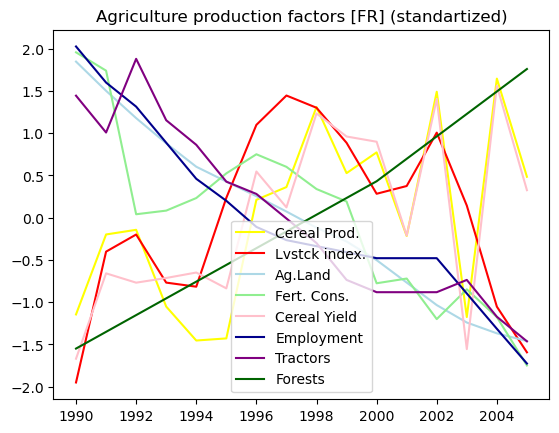

In [167]:
a = new_france.index
b = new_france['Cereal production (million metric tons)']
c = new_france['Livestock Index (%, /2005)']
d = new_france['Agricultural Land (% of land)']
e = new_france['Fertilizer consumption (kg/ha)']
f = new_france['Cereal yield (kg/ha)']
g = new_france['Number of Tractors']
h = new_france['Employment in agriculture (%)']
i = new_france['Forest area (% of land area)']

plt.plot(a, b, color='yellow', label='Cereal Prod.')
plt.plot(a, c, color='red', label='Lvstck index.')
plt.plot(a, d, color='lightblue', label='Ag.Land')
plt.plot(a, e, color='lightgreen', label='Fert. Cons.')
plt.plot(a, f, color='pink', label='Cereal Yield')
plt.plot(a, g, color='darkblue', label='Employment')
plt.plot(a, h, color='purple', label='Tractors')
plt.plot(a, i, color='darkgreen', label='Forests')


plt.title('Agriculture production factors [FR] (standartized)')
plt.legend(loc='lower center')

## Checking for Correlation

In [142]:
fra_corr = new_france.corr()

In [143]:
fra_corr

,Cereal production (million metric tons),"Livestock Index (%, /2005)",Agricultural Land (% of land),Fertilizer consumption (kg/ha),Cereal yield (kg/ha),Number of Tractors,Employment in agriculture (%),Forest area (% of land area)
Cereal production (million metric tons),1.000000,0.368538,-0.530380,-0.429096,0.920191,-0.526205,-0.594133,0.539361
"Livestock Index (%, /2005)",0.368538,1.000000,-0.213191,-0.009007,0.437306,-0.247761,-0.240215,0.111673
Agricultural Land (% of land),-0.530380,-0.213191,1.000000,0.891103,-0.565796,0.967891,0.944961,-0.990359
Fertilizer consumption (kg/ha),-0.429096,-0.009007,0.891103,1.000000,-0.458042,0.829742,0.755222,-0.885066
Cereal yield (kg/ha),0.920191,0.437306,-0.565796,-0.458042,1.000000,-0.604451,-0.637238,0.540175
Number of Tractors,-0.526205,-0.247761,0.967891,0.829742,-0.604451,1.000000,0.930580,-0.953466
Employment in agriculture (%),-0.594133,-0.240215,0.944961,0.755222,-0.637238,0.930580,1.000000,-0.944939
Forest area (% of land area),0.539361,0.111673,-0.990359,-0.885066,0.540175,-0.953466,-0.944939,1.000000


Text(0.5, 1.0, '[FR] Production Factors Correlation')

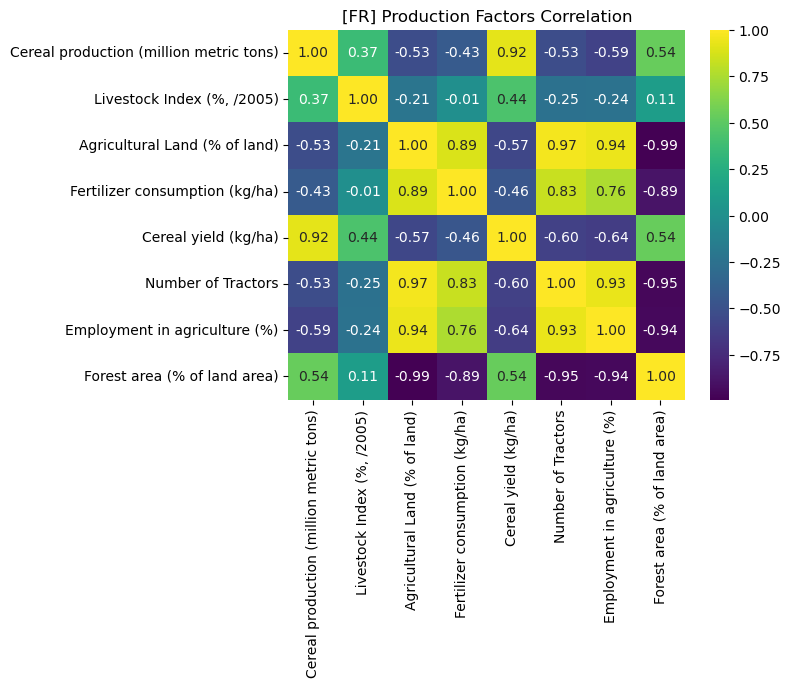

In [170]:
sn.heatmap(fra_corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('[FR] Production Factors Correlation')